<a href="https://colab.research.google.com/github/testedaisa/german-bank-credit-score/blob/main/GermanCreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# carregando o dataset direto do meu google drive
# te ensinei como fazer isso no módulo bônus de Git e GitHub
df = pd.read_csv("/content/drive/My Drive/Databases/german-credit-scoring/german_credit_risk.csv")
df

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [3]:
# visão geral do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [4]:
# conferindo o número de linhas e colunas do dataset
linhas = df.shape[0]
colunas = df.shape[1]
print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas


In [5]:
# conferindo se existem dados duplicados no dataset
duplicados = df.duplicated()
duplicados = duplicados.sum()
print('A base de dados possui %s dados duplicados' %(duplicados))

A base de dados possui 0 dados duplicados


In [6]:
# conferindo se existem dados nulos no dataset
nulos = df.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [7]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [8]:
# conferindo os domínios categóricos da variável
df['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [9]:
# criando um dicionário com as categorias e aplicando o método .map() para substituir os valores string para valores numéricos
categorias = {
    '< 0 DM': 1,
    '0 <= ... < 200 DM': 2,
    'no checking account': 3,
    '>= 200 DM / salary assignments for at least 1 year': 4
}
df['conta_corrente'] = df['conta_corrente'].map(categorias)


In [10]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [11]:
df['historico_credito'].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [12]:
categorias = {
    'critical account/ other credits existing (not at this bank)': 1,
    'existing credits paid back duly till now': 2,
    'delay in paying off in the past': 3,
    'no credits taken/ all credits paid back duly': 4,
    'all credits at this bank paid back duly': 5
}
df['historico_credito'] = df['historico_credito'].map(categorias)

In [13]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [14]:
df['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [15]:
categorias = {
    'domestic appliances': 1,
    '(vacation - does not exist?)': 2,
    'radio/television': 3,
    'car (new)': 4,
    'car (used)': 5,
    'business': 6,
    'repairs': 7,
    'education': 8,
    'furniture/equipment': 9,
    'retraining': 10
}
df['proposito_emprestimo'] = df['proposito_emprestimo'].map(categorias)

In [16]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [17]:
df['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM', '.. >= 1000 DM', '100 <= ... < 500 DM'],
      dtype=object)

In [18]:
categorias = {
    'unknown/ no savings account': 1,
    '... < 100 DM': 2,
    '500 <= ... < 1000 DM': 3,
    '.. >= 1000 DM': 4,
    '100 <= ... < 500 DM': 5,
}
df['reserva_cc'] = df['reserva_cc'].map(categorias)

In [19]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [20]:
df['tempo_emprego_atual'].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year'], dtype=object)

In [21]:
categorias = {
    '.. >= 7 years': 1,
    '1 <= ... < 4 years': 2,
    '4 <= ... < 7 years': 3,
    'unemployed': 4
}
df['tempo_emprego_atual'] = df['tempo_emprego_atual'].map(categorias)

In [22]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1.0,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2.0,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3.0,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3.0,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2.0,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [23]:
df['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [24]:
categorias = {
    'male : single': 1,
    'female : divorced/separated/married': 2,
    'male : divorced/separated': 3,
    'male : married/widowed': 4
}
df['sexo_est_civil'] = df['sexo_est_civil'].map(categorias)

In [25]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1.0,4,1,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2.0,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3.0,2,1,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3.0,2,1,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2.0,3,1,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [26]:
df['propriedade'].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [27]:
categorias = {
    'real estate': 1,
    'if not A121 : building society savings agreement/ life insurance': 2,
    'unknown / no property': 3,
    'if not A121/A122 : car or other, not in attribute 6': 4
}
df['propriedade'] = df['propriedade'].map(categorias)

In [28]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1.0,4,1,...,4,1,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2.0,2,2,...,2,1,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3.0,2,1,...,3,1,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3.0,2,1,...,4,2,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2.0,3,1,...,4,3,53,none,for free,2,skilled employee / official,2,none,yes


In [29]:
df['outros_planos_financiamento'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [30]:
categorias = {
    'none': 1,
    'bank': 2,
    'stores': 3
    }
df['outros_planos_financiamento'] = df['outros_planos_financiamento'].map(categorias)

In [31]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1.0,4,1,...,4,1,67,1,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2.0,2,2,...,2,1,22,1,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3.0,2,1,...,3,1,49,1,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3.0,2,1,...,4,2,45,1,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2.0,3,1,...,4,3,53,1,for free,2,skilled employee / official,2,none,yes


In [32]:
df['tipo_residencia'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [33]:
categorias = {
    'own': 1,
    'for free': 2,
    'rent': 3
    }
df['tipo_residencia'] = df['tipo_residencia'].map(categorias)

In [34]:
df['status_emprego'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [35]:
categorias = {
    'skilled employee / official': 1,
    'unskilled - resident': 2,
    'management/ self-employed/ highly qualified employee/ officer': 3,
    'unemployed/ unskilled - non-resident':4
    }
df['status_emprego'] = df['status_emprego'].map(categorias)

In [36]:
df['telefone'].unique()

array(['yes, registered under the customers name ', 'none'], dtype=object)

In [37]:
categorias = {
    'yes, registered under the customers name': 1,
    'none': 2
    }
df['telefone'] = df['telefone'].map(categorias)

In [38]:
df['trabalhador_estrangeiro'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
categorias = {
    'yes': 1,
    'no': 2
    }
df['trabalhador_estrangeiro'] = df['trabalhador_estrangeiro'].map(categorias)

In [40]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1.0,4,1,...,4,1,67,1,1,2,1,1,NaN,1
1,1,2,48,2,1,5951,2,2.0,2,2,...,2,1,22,1,1,1,1,1,2.0,1
2,0,3,12,1,2,2096,2,3.0,2,1,...,3,1,49,1,1,1,2,2,2.0,1
3,0,1,42,2,3,7882,2,3.0,2,1,...,4,2,45,1,2,1,1,2,2.0,1
4,1,1,24,3,4,4870,2,2.0,3,1,...,4,3,53,1,2,2,1,2,2.0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   default                      1000 non-null   int64  
 1   conta_corrente               1000 non-null   int64  
 2   prazo_emprestimo_meses       1000 non-null   int64  
 3   historico_credito            1000 non-null   int64  
 4   proposito_emprestimo         1000 non-null   int64  
 5   valor_emprestimo             1000 non-null   int64  
 6   reserva_cc                   1000 non-null   int64  
 7   tempo_emprego_atual          828 non-null    float64
 8   taxa_comp_salario            1000 non-null   int64  
 9   sexo_est_civil               1000 non-null   int64  
 10  outros_fiadores              1000 non-null   object 
 11  anos_residencia_atual        1000 non-null   int64  
 12  propriedade                  1000 non-null   int64  
 13  idade              

In [42]:
df['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [43]:
categorias = {
    'none': 1,
    'guarantor': 2,
    'co-applicant':3
    }
df['outros_fiadores'] = df['outros_fiadores'].map(categorias)

In [54]:
df['tempo_emprego_atual'] = df['tempo_emprego_atual'].fillna(0)
df['telefone'] = df['telefone'].fillna(0)

In [55]:
df['tempo_emprego_atual'] = df['tempo_emprego_atual'].astype(int)
df['telefone'] = df['telefone'].astype(int)

In [56]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,0,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


In [114]:
# definindo uma lista com as variáveis que eu quero analisar
# é possível perceber que esse tipo de análise não faz sentido para variáveis categóricas e binárias
var_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
df[var_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [115]:
# homens 1,3,4
# mulheres 2
df['sexo_est_civil'].value_counts()

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

In [116]:
df['default'].value_counts()
# dados desbalaceados -> a acurácia não é o melhor parâmetro pra avaliar esse modelo

0    700
1    300
Name: default, dtype: int64

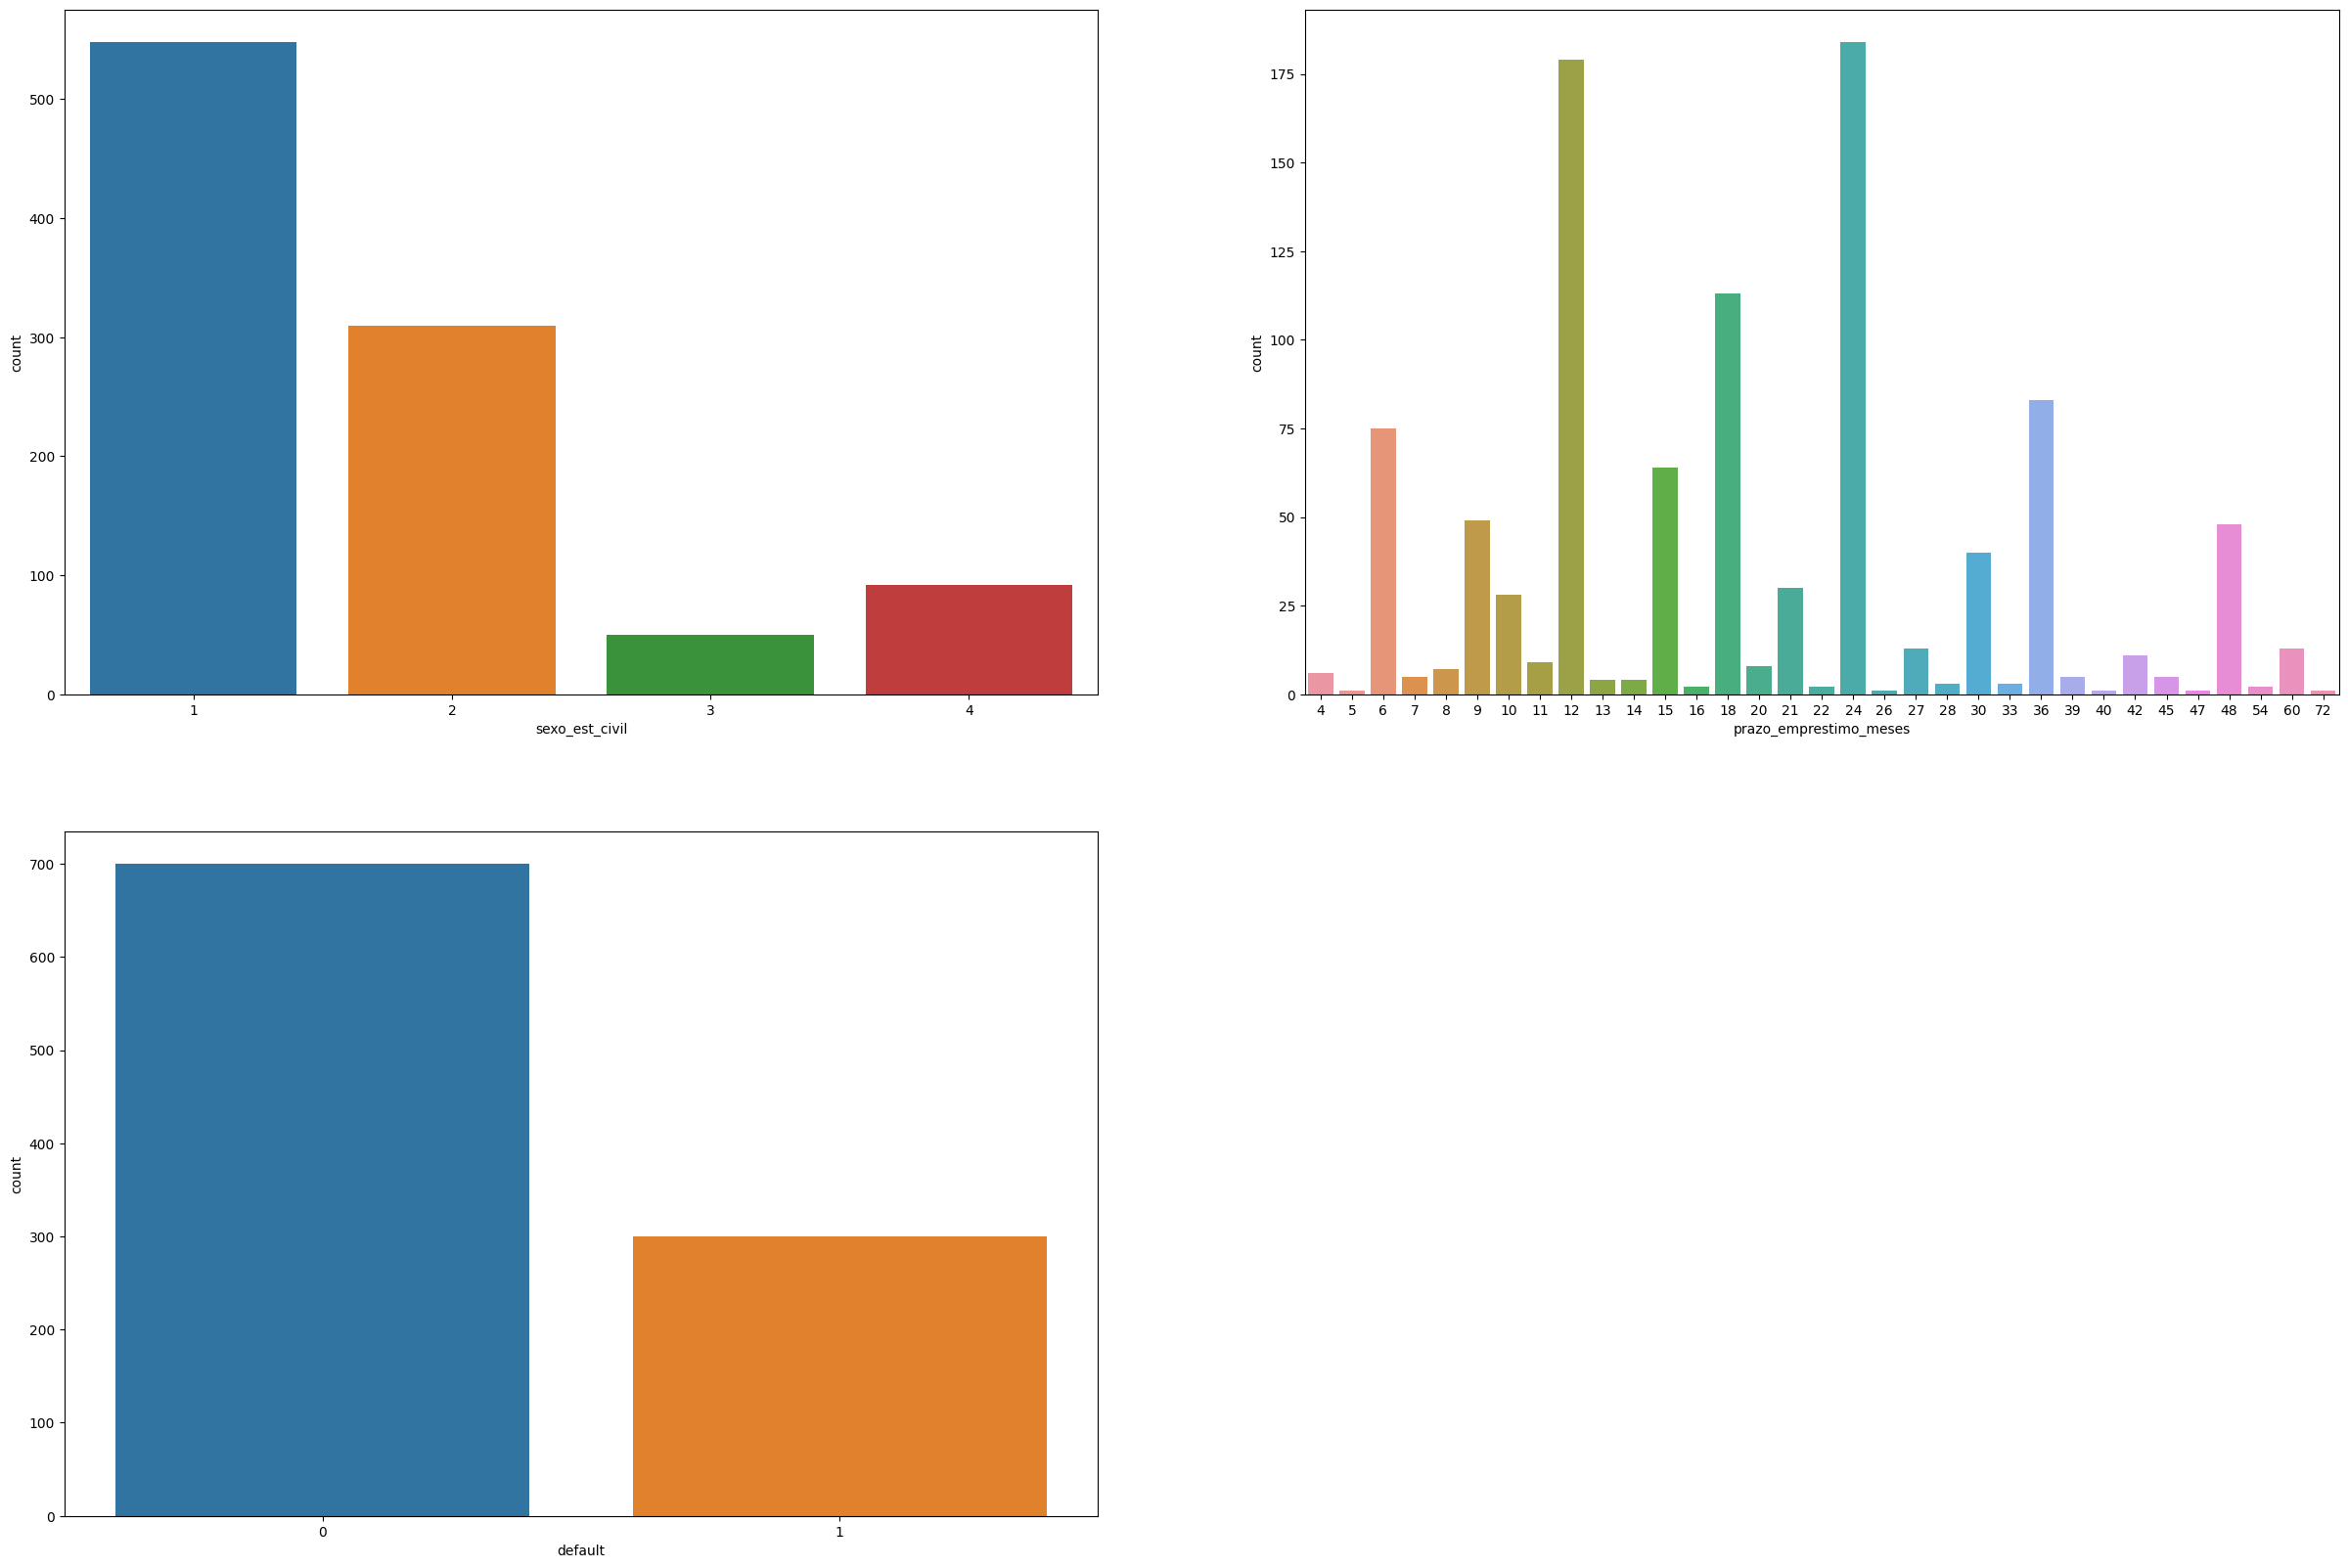

In [119]:
# analisando a distribuição das variáveis categóricas e binárias usando histograma
import seaborn as sns

var_histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']
lista_histogramas = list(enumerate(var_histogramas))

plt.figure(figsize= (30,20))

for i in lista_histogramas:
  plt.subplot(2,2,i[0]+1)
  sns.countplot(x = i[1], data = df)

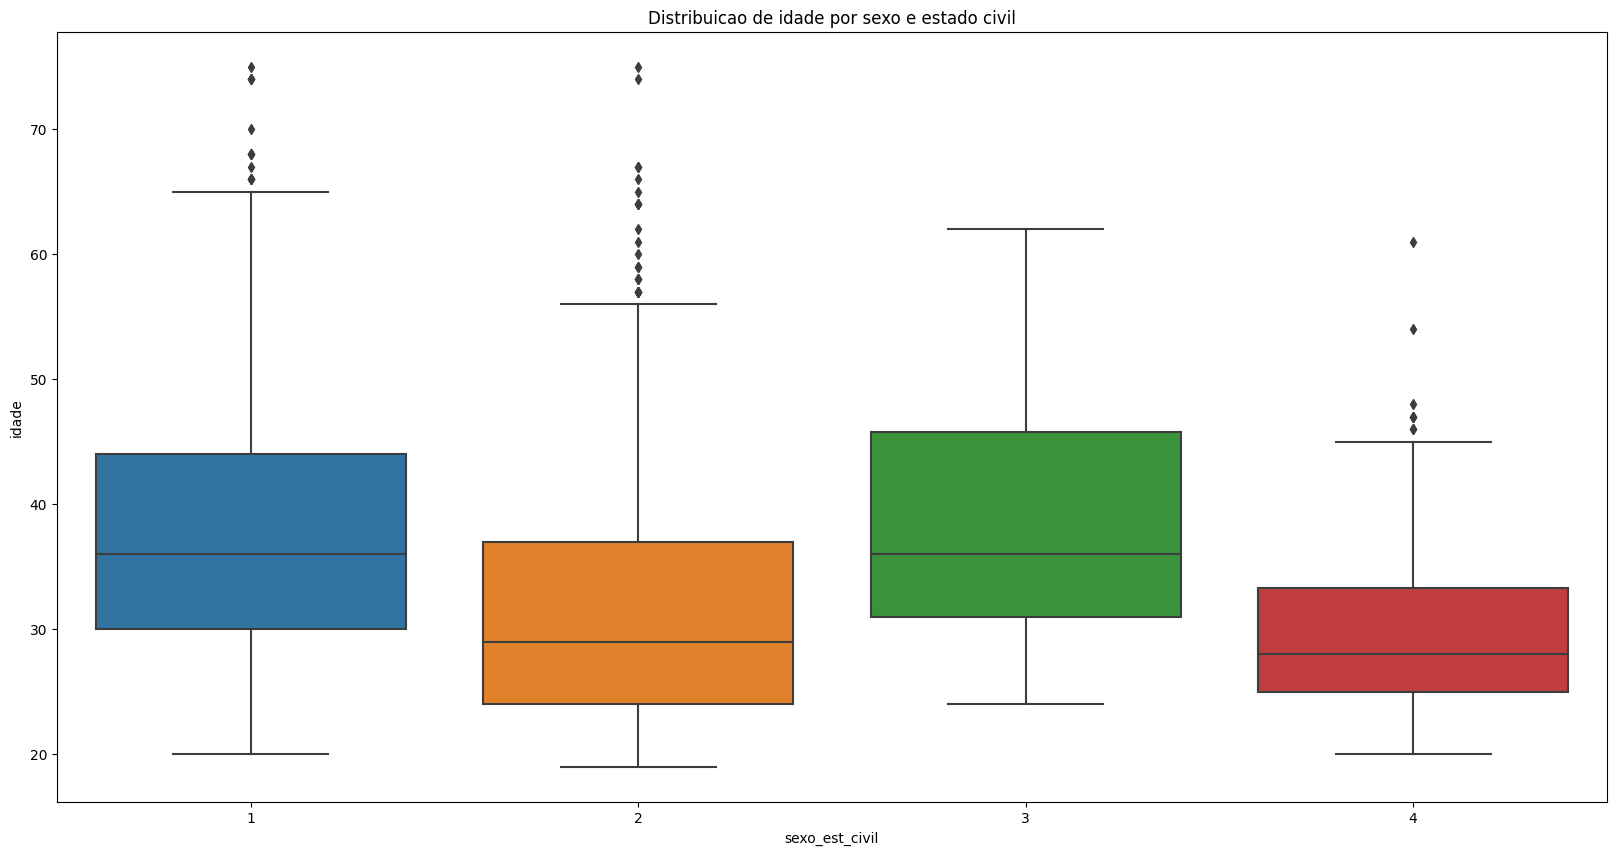

In [123]:
# analisando a distribuição das variáveis categóricas e binárias usando boxplot
plt.figure(figsize= (20,10))
sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = df)
plt.title('Distribuicao de idade por sexo e estado civil')
plt.show()

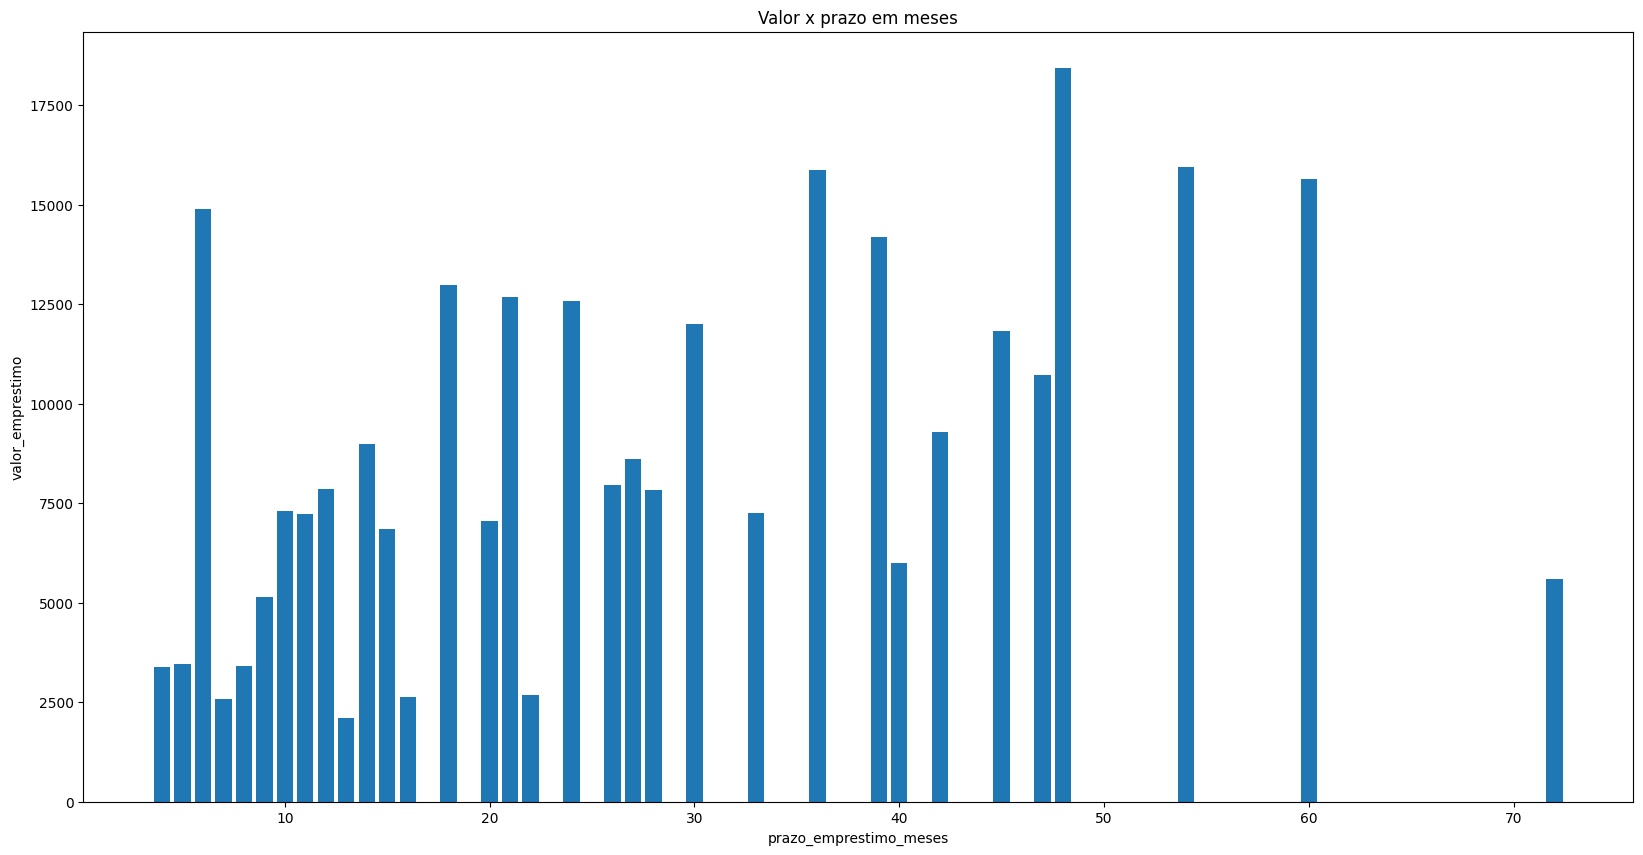

In [125]:
# analisando a correlação entre as variáveis usando gráfico de barras
plt.figure(figsize= (20,10))
plt.bar(df.prazo_emprestimo_meses, df.valor_emprestimo)
plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor x prazo em meses')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# separando a variável 'default' das outras variáveis do dataset
target = df['default']
features = df.drop(columns = 'default')

In [ ]:
# o valor de SEED pode ser o que você quiser
# esse recurso é utilizado porque os hiperparâmetros dos algoritmos de machine learning são inicializados randomicamente. Isso implica em obter um resultado diferente a cada vez que o algoritmo for executado
# para fixar e obter sempre a mesma resposta, utilizamos uma 'semente' para que os hiperparâmetros sejam sempre inicializados com o mesmo valor

# utilizando o método train_test_split para dividir o dataset em base de treino e base de teste
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(features, target, test_size = 0.3, random_state = SEED)

In [ ]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos


In [ ]:
# treinando um algoritmo de regressão logística e obtendo a acurácia de treinamento
modelo = LogisticRegression(max_iter = 1000)
modelo.fit(treino_x, treino_y)
print(round(modelo.score(treino_x, treino_y),3)*100)

75.7


In [ ]:
# aplicando o modelo treinado na base de teste e pegando as previsões
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# obtendo a acurácia do teste
acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

77.3

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# plotando a matriz de confusão para avaliar a incidência de erros do tipo I e erros do tipo II
matriz_confusao = confusion_matrix(teste_y, previsoes)
matriz_confusao

array([[194,  20],
       [ 48,  38]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# obtendo as métricas inferidas da matriz de confusão
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       214
           1       0.66      0.44      0.53        86

    accuracy                           0.77       300
   macro avg       0.73      0.67      0.69       300
weighted avg       0.76      0.77      0.76       300



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# usando predict_proba() para obter a probabilidade da decisão prevista acontecer
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa de falsos positivos
#tvp = taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

roc_auc 0.7655944359921756


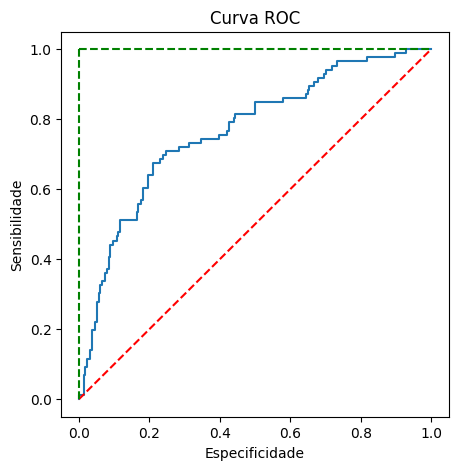

In [ ]:
# plotando a curva ROC e as linhas de base
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0,1], ls = "--", c = 'red') #plotando linha pontilhada vermelha
plt.plot([0,0], [1,0], ls = "--", c = 'green'), plt.plot([1,1], ls = "--", c = 'green') #plotando linhas pontilhadas verdes
plt.show()